Integrantes:

1. Jose Romualdo Villalobos Perez
2. Romualdo Jose Villalobos Perez
3. Sebastian

# El problema
Un banco alemán desea establecer políticas de mercadeo según el tipo de cliente. Para esto se desean identificar tipos de clientes de una base de datos de 1000 registros con 20 atributos cada uno.

In [143]:
#Importar librerias
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd

import seaborn as sns

In [144]:
# Para este ejercicio vamos a usar la version numerica del data set para facilitar el uso de algoritmos que solo soportan valores numericos
# En el siguiente link se puede entender mejor los datos de dicho dataset https://www.reddit.com/r/MachineLearning/comments/2f6dns/understanding_statlog_german_credit_data_numeric/

In [145]:
Data = pd.read_csv("german_credit_data_modified.csv")
print (Data.columns)
Data.head(10)

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


In [146]:
print("Purpose : ",Data.Purpose.unique())
print("Sex : ",Data.Sex.unique())
print("Housing : ",Data.Housing.unique())
print("Saving accounts : ",Data['Saving accounts'].unique())
print("Checking account : ",Data['Checking account'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account :  ['little' 'moderate' nan 'rich']


In [147]:
# Converts categorical variables to numerical and removs NA values
Data['Saving accounts'] = Data['Saving accounts'].map({"little":0,"moderate":1,"quite rich":2 ,"rich":3 });
Data['Saving accounts'] = Data['Saving accounts'].fillna(Data['Saving accounts'].dropna().mean())

Data['Checking account'] = Data['Checking account'].map({"little":0,"moderate":1,"rich":2 });
Data['Checking account'] = Data['Checking account'].fillna(Data['Checking account'].dropna().mean())

Data['Sex'] = Data['Sex'].map({"male":0,"female":1}).astype(float);

Data['Housing'] = Data['Housing'].map({"own":0,"free":1,"rent":2}).astype(float);

Data['Purpose'] = Data['Purpose'].map({'radio/TV':0, 'education':1, 'furniture/equipment':2, 'car':3, 'business':4,
       'domestic appliances':5, 'repairs':6, 'vacation/others':7}).astype(float);

Data.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,0.0,2,0.0,0.456548,0.000000,1169,6,0.0
1,1,22,1.0,2,0.0,0.000000,1.000000,5951,48,0.0
2,2,49,0.0,1,0.0,0.000000,0.651815,2096,12,1.0
3,3,45,0.0,2,1.0,0.000000,0.000000,7882,42,2.0
4,4,53,0.0,2,1.0,0.000000,0.000000,4870,24,3.0
5,5,35,0.0,1,1.0,0.456548,0.651815,9055,36,1.0
6,6,53,0.0,2,0.0,2.000000,0.651815,2835,24,2.0
7,7,35,0.0,3,2.0,0.000000,1.000000,6948,36,3.0
8,8,61,0.0,1,0.0,3.000000,0.651815,3059,12,0.0
9,9,28,0.0,3,0.0,0.000000,1.000000,5234,30,3.0


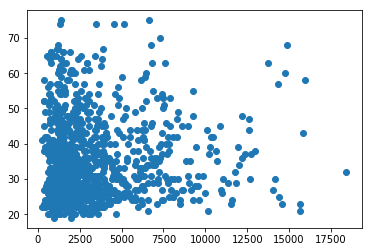

In [148]:
# Ploting credit amount vs age
plt.scatter(Data['Credit amount'],Data["Age"])
plt.figure()

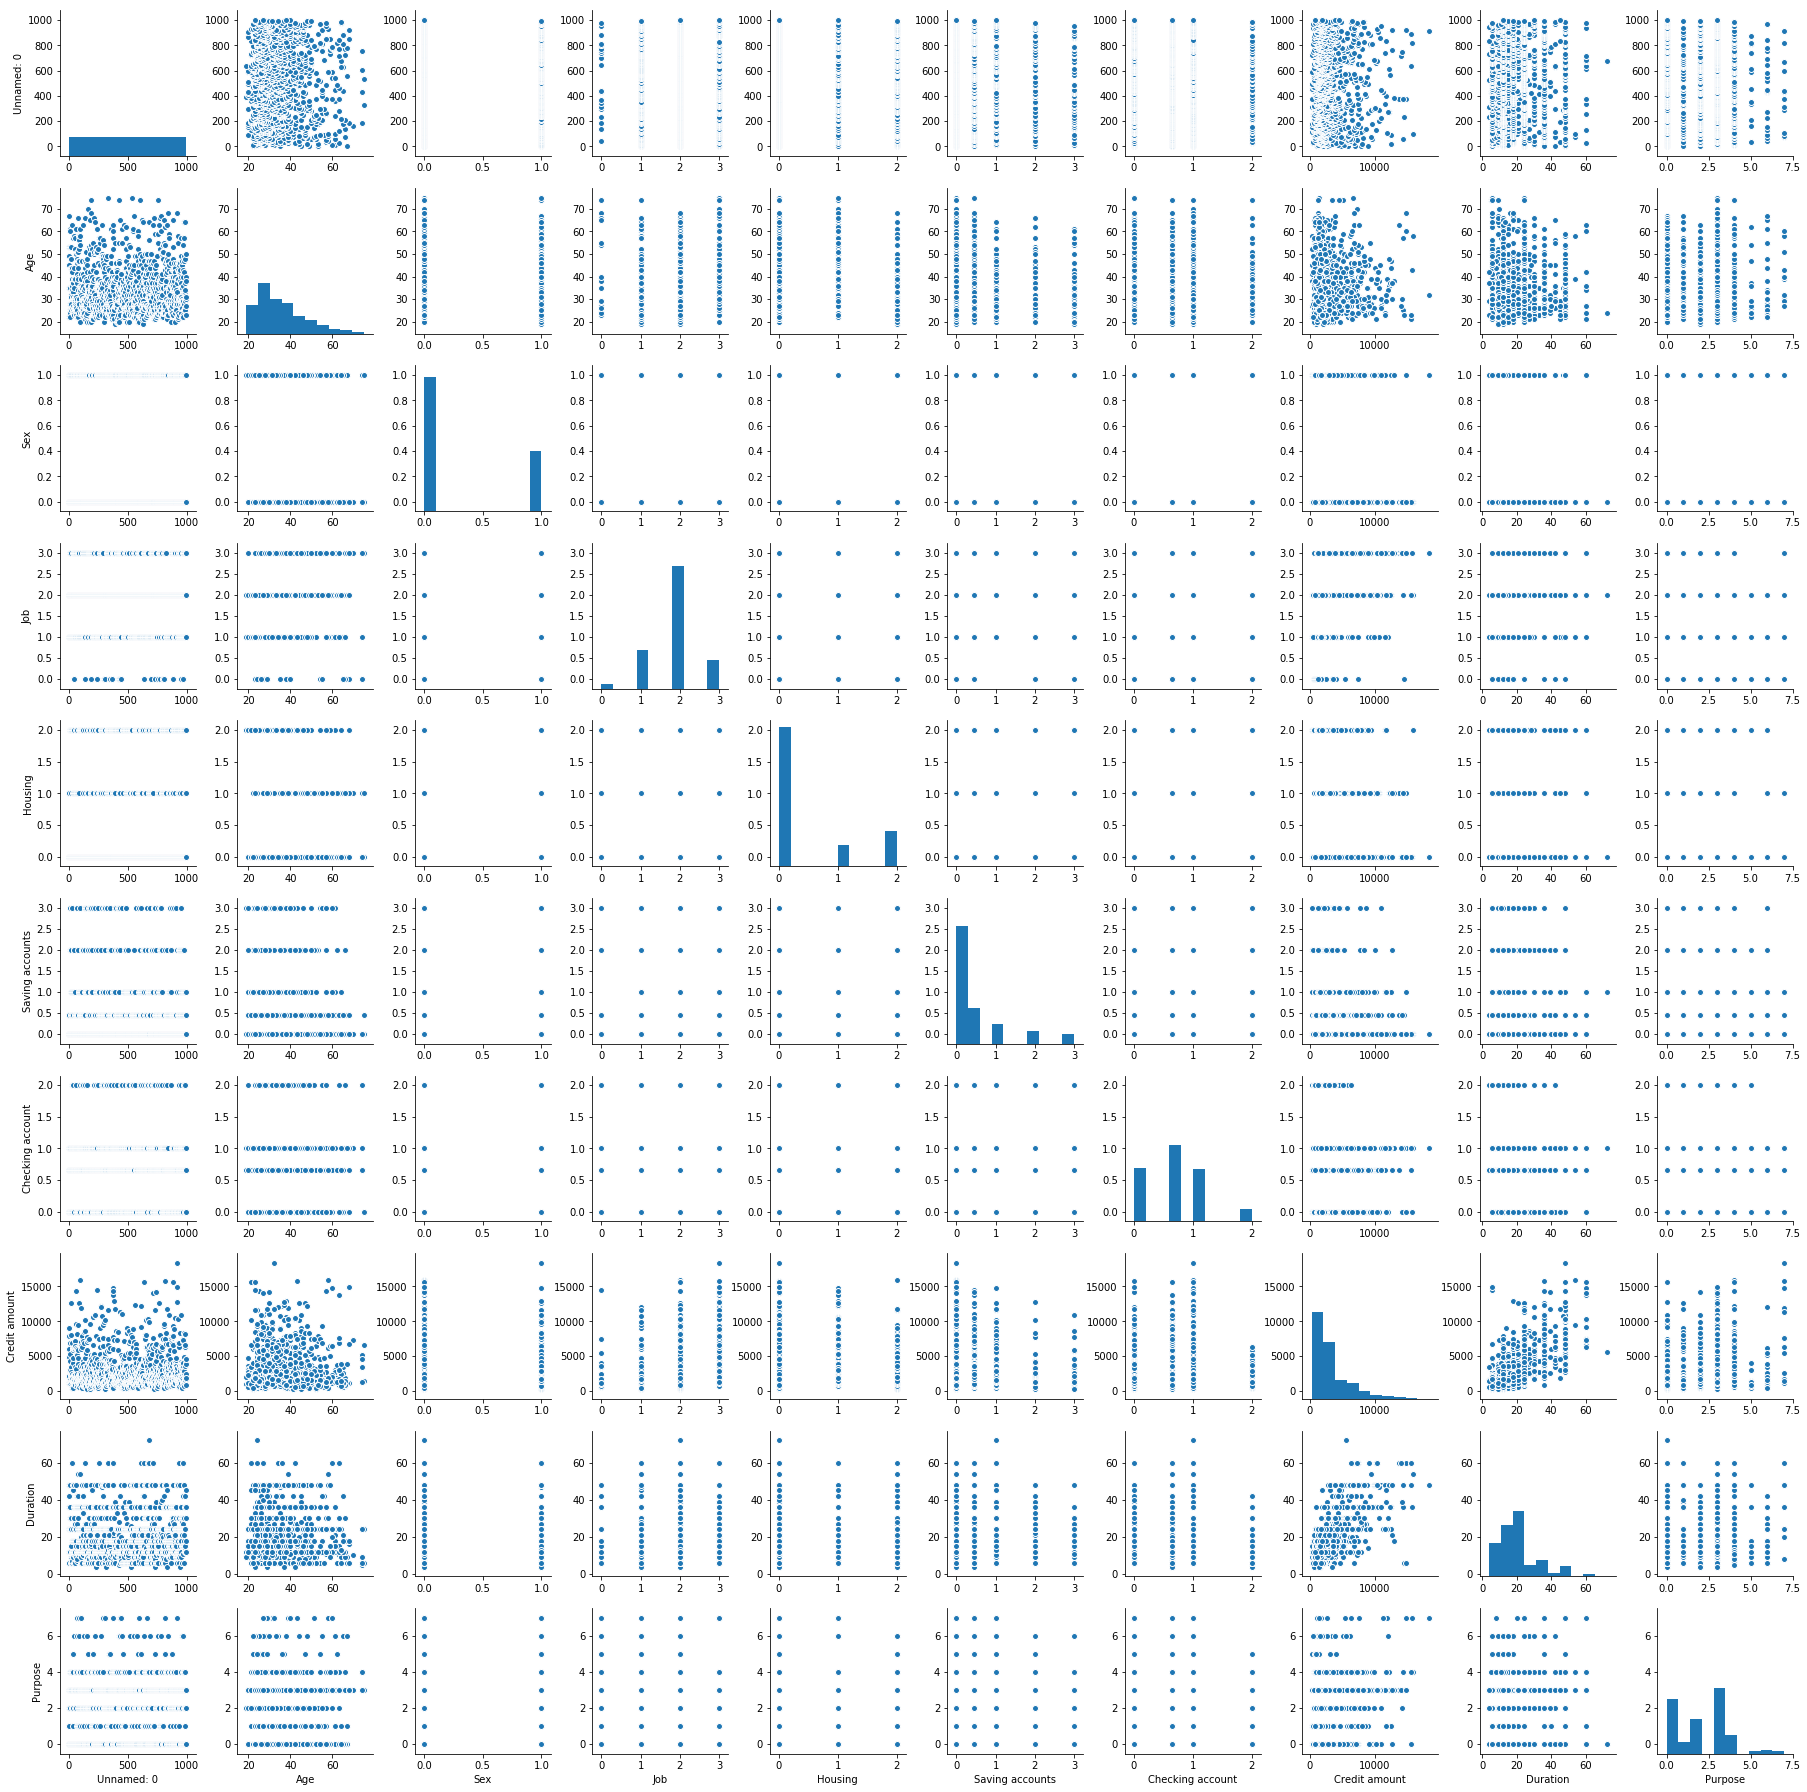

In [149]:
sns.pairplot(Data)

Text(7,-50,'vacation')

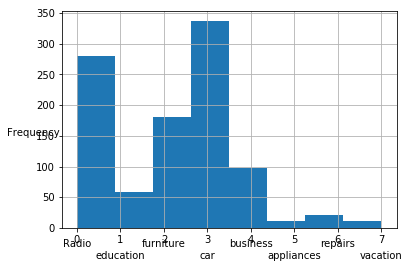

In [150]:
fig = Data["Purpose"].hist(bins=8)
fig.text(-1, 150, 'Frequency', ha='center')
fig.text(0, -30, 'Radio', ha='center')
fig.text(1, -50, 'education', ha='center')
fig.text(2, -30, 'furniture', ha='center')
fig.text(3, -50, 'car', ha='center')
fig.text(4, -30, 'business', ha='center')
fig.text(5, -50, 'appliances', ha='center')
fig.text(6, -30, 'repairs', ha='center')
fig.text(7, -50, 'vacation', ha='center')

Text(0,40,'Frequency')

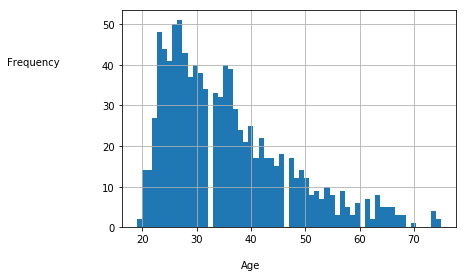

In [151]:
fig = Data.Age.hist(bins=60)
fig.text(40, -10, 'Age', ha='center')
fig.text(0, 40, 'Frequency', ha='center')

# Clusters

1. Personas que piden credito para radio/tv, furniture o automovil
2. Personas con edad entre 22 y 37
3. Creditos de hasta 10k cuya duracion sea inferior a los 40 meses.
4. Personas de hasta 50 años que tienen creditos inferiores a los 40 messe

# Aplicando metodos de clustering
## KMeans
    

In [152]:
from sklearn.cluster import KMeans;
from sklearn.decomposition import PCA; 
from sklearn.preprocessing import normalize;
from sklearn.metrics import silhouette_score

In [153]:
y = KMeans(n_clusters=4).fit_predict(Data)
X_norm = normalize(Data);
y_PCA = PCA(n_components=4).fit_transform(X_norm,2);
y_PCA.shape

(1000, 4)

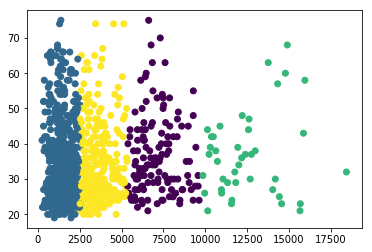

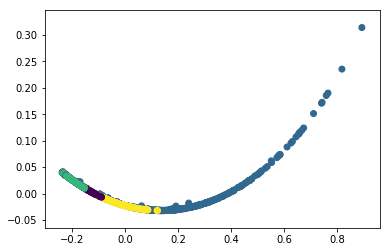

In [154]:
plt.scatter(Data['Credit amount'], Data['Age'], c=y)
plt.figure()
plt.scatter(y_PCA[:,0],y_PCA[:,1],c=y)

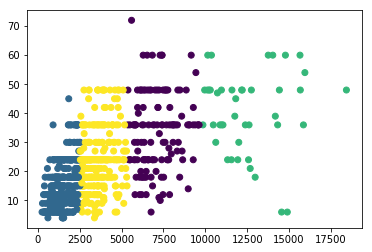

In [155]:
plt.scatter(Data['Credit amount'], Data['Duration'], c=y)

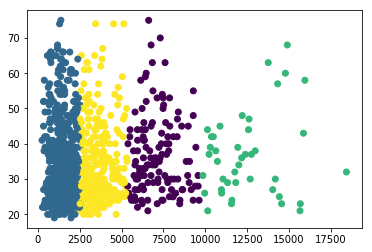

In [156]:
plt.scatter(Data['Credit amount'], Data['Age'], c=y)

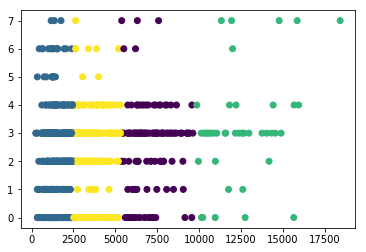

In [157]:
plt.scatter(Data['Credit amount'], Data['Purpose'], c=y)

### Evaluando

In [158]:
# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
sample_size, = y.shape
print('silhouette_score: ', silhouette_score(Data, y, metric='euclidean', sample_size=sample_size) )

silhouette_score:  0.56273886117


## Cobweb

In [159]:
from random import shuffle
from random import seed

from concept_formation.cobweb3 import Cobweb3Tree
from concept_formation.cluster import cluster
from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import adjusted_rand_score
from concept_formation.datasets import load_iris

In [160]:
attrs = np.array(Data.columns.tolist())
attrs
len(attrs)

10

In [161]:
tree = Cobweb3Tree()

# column names
attrs = np.array(Data.columns.tolist())
attrs


# Converts the dataframe to multidimensional array for use in multiple algorithms
Data_arr = Data.values[:,:]

'''
Converts dataframe to json
[{'Age': 67.0,
  'Checking account': 0.0,
  'Credit amount': 1169.0,
  'Duration': 6.0,
  'Housing': 0.0,
  'Job': 2.0,
  'Purpose': 0.0,
  'Saving accounts': 0.45654834761321911,
  'Sex': 0.0,
  'Unnamed: 0': 0.0},
 {'Age': 22.0,
  'Checking account': 1.0,
  'Credit amount': 5951.0,
  'Duration': 48.0,
  'Housing': 0.0,
  'Job': 2.0,
  'Purpose': 0.0,
  'Saving accounts': 0.0,
  'Sex': 1.0,
  'Unnamed: 0': 1.0},
  ...
  {}
  ]
''' 
credits_X_dic = [{attrs[i]: customer[i] for i in range(len(attrs))} for customer in Data_arr]
credits_X_dic

clusters = cluster(tree, credits_X_dic)[0]

In [166]:
np.unique(clusters)

array(['Concept1170643', 'Concept1171020', 'Concept1175656'],
      dtype='<U14')

In [169]:
cluster_labels = [0 if cluster=='Concept1170643' else 1 if cluster=='Concept1171020' else 2 for cluster in clusters]
# cluster_labels
print( 'silhouette_score: ', silhouette_score(Data, cluster_labels, metric='euclidean', sample_size=sample_size) )

silhouette_score:  0.0286213420995


# Self-organizing maps

In [170]:
from time import time
# We need to delete the imports of ipdb in this library https://github.com/sevamoo/SOMPY/issues/61
# pip packages are installed in C:\Users\<user>\Anaconda3\Lib\site-packages
import sompy

In [171]:
# Tutorial https://gist.github.com/sevamoo/035c56e7428318dd3065013625f12a11
mapsize = [20,20]
som = sompy.SOMFactory.build(Data_arr, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything

 Training...
 pca_linear_initialization took: 0.014000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 12

 epoch: 1 ---> elapsed time:  0.112000, quantization error: 2.570933

 epoch: 2 ---> elapsed time:  0.110000, quantization error: 2.415503

 epoch: 3 ---> elapsed time:  0.110000, quantization error: 2.247516

 epoch: 4 ---> elapsed time:  0.106000, quantization error: 2.136720

 epoch: 5 ---> elapsed time:  0.115000, quantization error: 2.049383

 epoch: 6 ---> elapsed time:  0.116000, quantization error: 1.981060

 epoch: 7 ---> elapsed time:  0.120000, quantization error: 1.921393

 epoch: 8 ---> elapsed time:  0.117000, quantization error: 1.864758

 epoch: 9 ---> elapsed time:  0.117000, quantization error: 1.805079

 epoch: 10 ---> elapsed time:  0.119000, quantization error: 1.738586

 epoch: 11 ---> elapsed time:  0.111000, quantization error: 1.670776

 epoch: 12 ---> elapsed time:  0.110000, quantization error: 1.594502

 Finetune tra

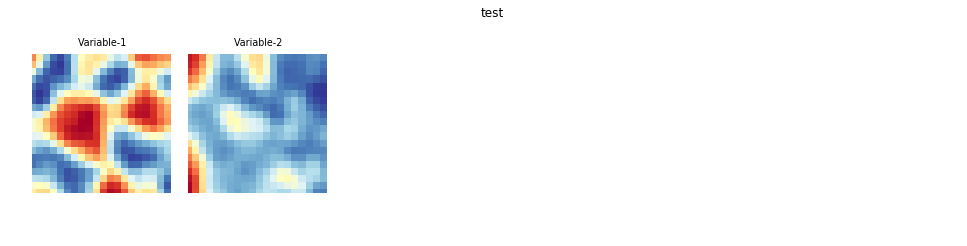

In [172]:
v  = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', which_dim=[0,1], cmap=None, col_sz=6) #which_dim='all' default
# v.save('2d_packed_test')

# Metodos jerarquicos

In [173]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [174]:
# Generacion de la matriz de linkage
# se utiliza la distancia ward, pero hay otras distancias:
#  'euclidean' (default), 'cityblock' aka Manhattan, 'hamming', 'cosine'...
# y existen varios metodos de linkage  'single', 'complete', 'average', ... 
Z = linkage(Data_arr, 'ward')

In [176]:
# Algo bueno es verificar el  Cophenetic Correlation Coefficient del cluster
# con la función cophenet (). Este coeficiente correlaciona las distancias 
# por pares de todas las muestras que esten en cada cluster jerárquico. 
# Cuanto más cerca esté el valor de 1, mejor será el cluster

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(Data_arr))
c

0.79006888481868742

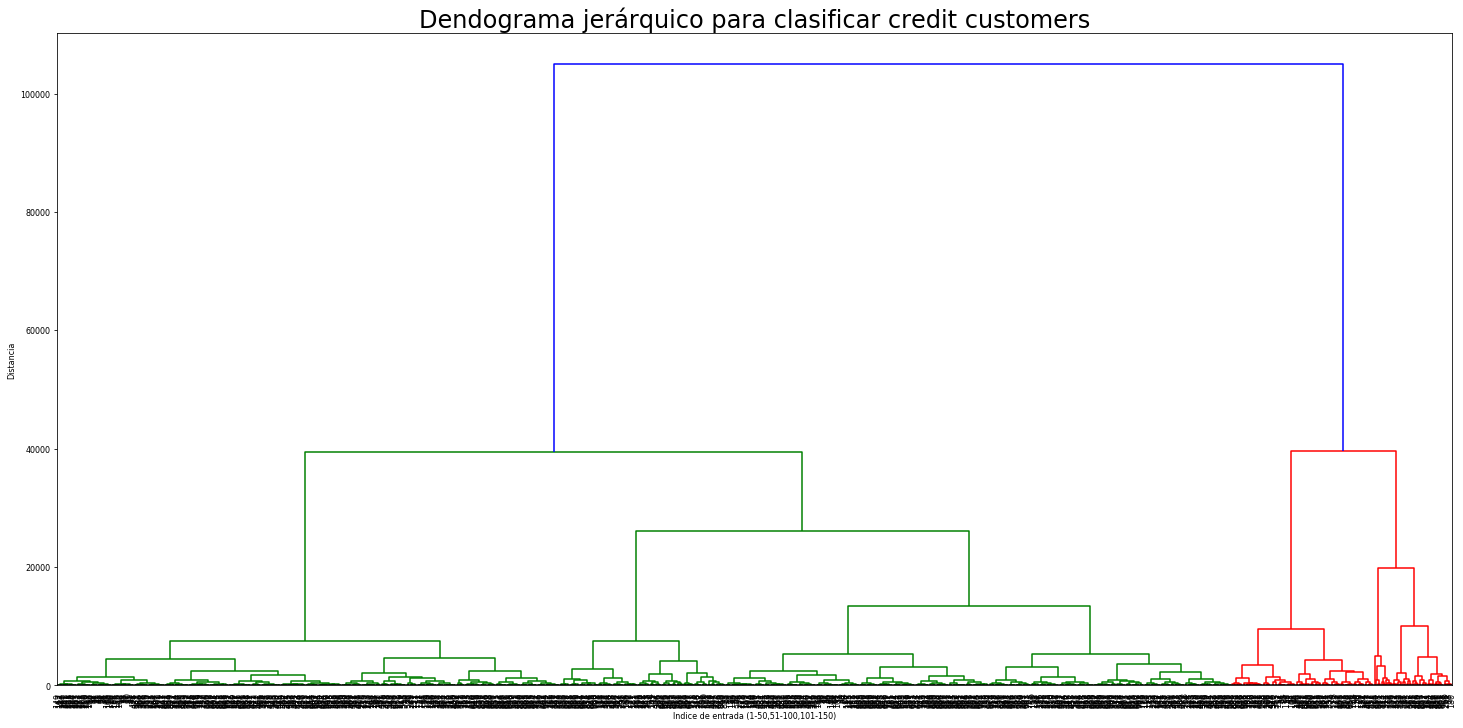

In [177]:
plt.figure(figsize=(25, 12))
plt.title('Dendograma jerárquico para clasificar credit customers',fontsize=24)
plt.xlabel('Indice de entrada (1-50,51-100,101-150)')
plt.ylabel('Distancia')
max_d = 10
den = dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,  
        show_contracted=True
    )
plt.axhline(y=max_d, c='k')
plt.show()